In [13]:
# jupyter notebook extension to reload imports

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from neatcrat import *
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100
x = plt.ioff()

In [15]:
# BIG FILTER

def get_files_with_label(label):
    names = []
    for file_name in Data.all_file_names:
        if label in Scene.from_data(Data(file_name)).third_class.values():
            names.append(file_name)
    return sorted(names, key=lambda x: int(x.split('.')[0]))

names = get_files_with_label('1.1.1 LeadVehicleConstant')

In [16]:
file_name = names[15] # 一共有72个 leadvehicleconstant!
s:Scene = Scene.from_data(Data(file_name)) # usual pattern to get a scene
print(file_name)
Debug.print_third_class_intervals(s) # tells you which timestamps are of what label (see output)
start = 0; end = 17 # for framing the scene into a scene with a specific label (eg. only leadvehicle constant)

294.csv
1.1.1 LeadVehicleConstant [0 ~ 17]
1.1.2 LeadVehicleCutOut [17 ~ 20]


In [ ]:
p = Plot(-30, 30, -20, 150, 4); p.draw_scene(s, start, end) # numbers are the dimensions, xmin,xmax,ymin,ymax, usually only need to change ymax, 80~300
# functions drawing videos do not need .show()
# green means not in front, (is_in_front_of function in agent.py), gray means not car (bikes and stuff)

False


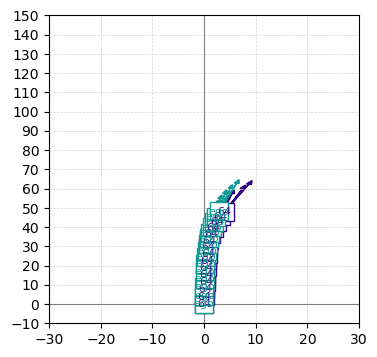

In [ ]:
p = Plot(-30, 30, -10, 150, 4)

i=end+1; rg=15; tr=1; dt=11

t = s.trajectories['64']; e = s.trajectories['ego'] # get the agent you think is the main related agent
print(TrajectoryPatternMatcher.lead_constant(t[start:end], e[start:end])) # this is testing a classification, checking if 64 is leading ego in this case
# note: slicing trajectory returns a list of agents

# this is testing an old algorithm, can ignore
# fyi: description of the old algorithm
# 1. find the timestamp where ego first touches leading vehicle's trajectory (dt (delta) in this case)
# 2. extend trajectory for both agents from there for a period of time (rg (range) in this case)
# 3. translate extended trajectories to origin and see if they match (tr (translate) means translate to origin or not, could toggle and test)
# maybe translating to origin is unnecessary... i don't know why i implemented that, keep if you think it will be useful later on.
p.draw_trajectory(Debug.translate_trajectory(t, t[start].x*tr, t[start].y*tr), start, start+rg, '#320483')
p.draw_trajectory(Debug.translate_trajectory(e, e[start+dt].x*tr, e[start+dt].y*tr), start+dt, start+dt+rg, '#129994')
p.show()